In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

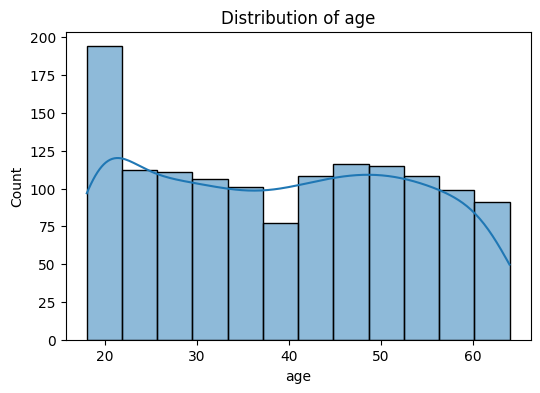

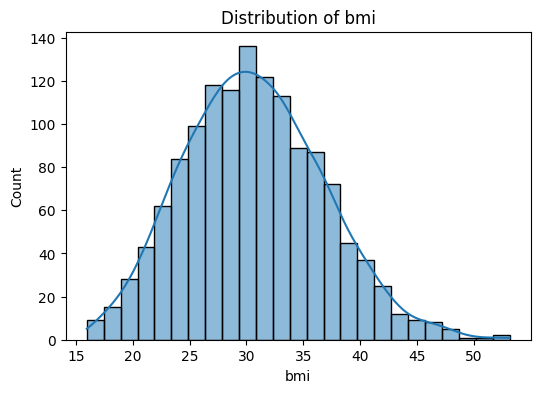

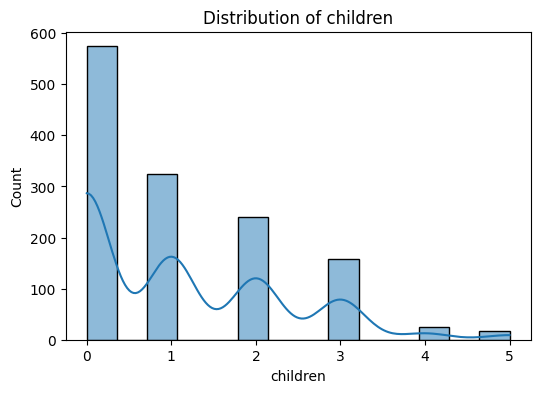

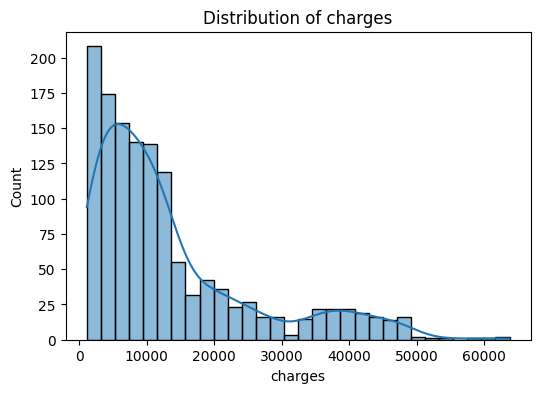

In [12]:
num = ['age', 'bmi', 'children', 'charges']
for num in num:
    plt.figure(figsize=(6,4))
    sns.histplot(data[num], kde=True)
    plt.title(f'Distribution of {num}')
    plt.show()

<Axes: xlabel='sex', ylabel='count'>

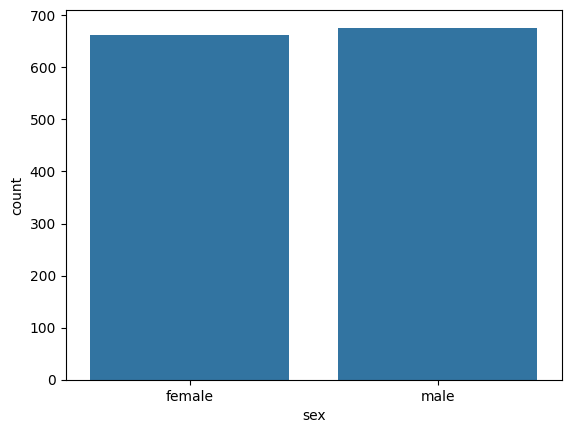

In [13]:
sns.countplot(x='sex', data=data)

<Axes: xlabel='smoker', ylabel='count'>

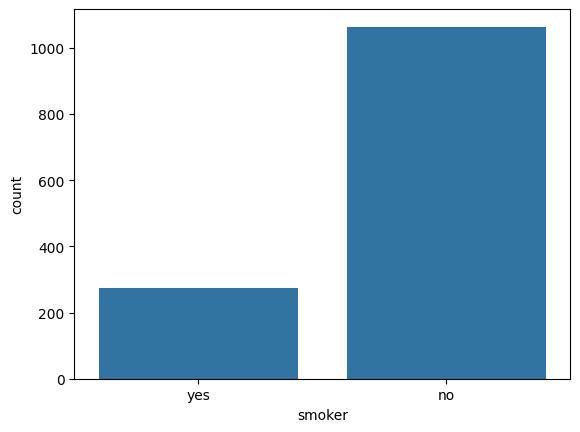

In [14]:
sns.countplot(data=data, x='smoker' )

<Axes: xlabel='smoker', ylabel='count'>

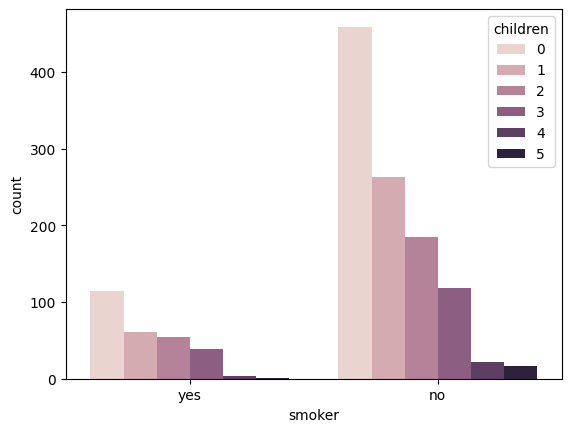

In [15]:
sns.countplot(data=data, x='smoker', hue='children')


<Axes: xlabel='smoker', ylabel='count'>

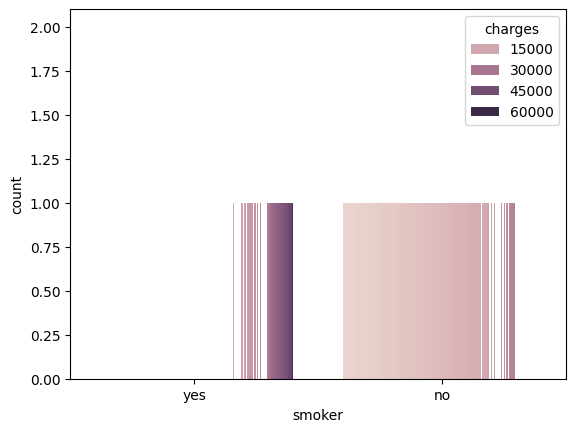

In [16]:
sns.countplot(data=data, x='smoker', hue='charges')


<Axes: xlabel='smoker', ylabel='charges'>

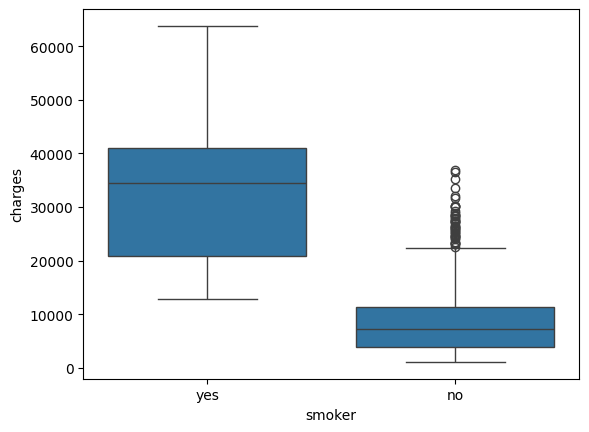

In [17]:
sns.boxplot(x='smoker', y='charges', data=data)

<Axes: xlabel='age_group', ylabel='count'>

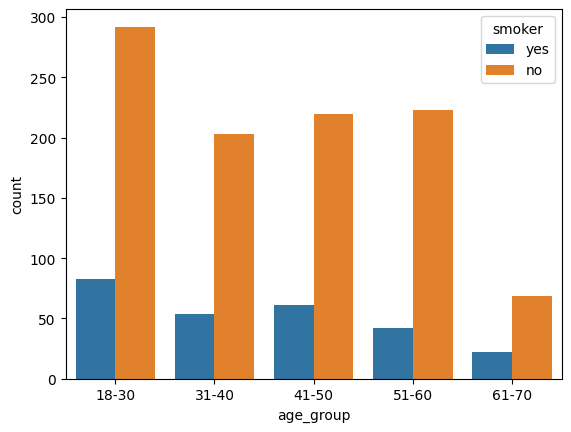

In [22]:
data['age_group'] = pd.cut(
    data['age'],
    bins=[18, 30, 40, 50, 60, 70],
    labels=['18-30', '31-40', '41-50', '51-60', '61-70']
)
sns.countplot(data=data, x='age_group', hue='smoker')


<Axes: >

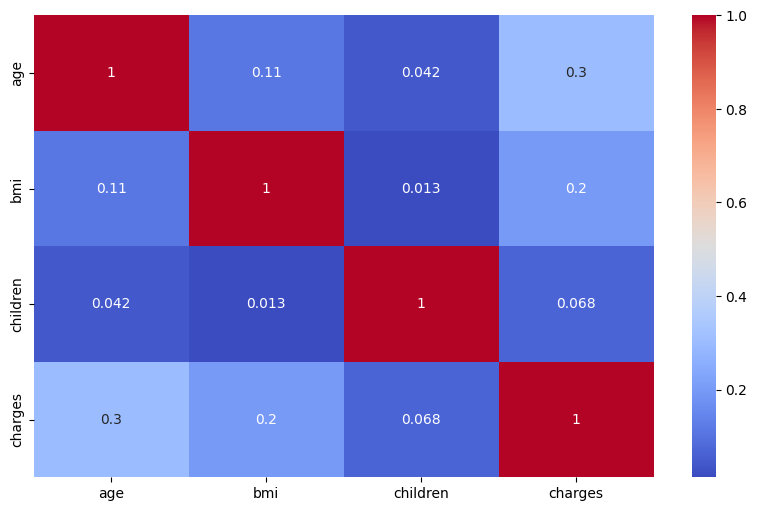

In [25]:
num = data.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(num.corr(),annot=True,cmap='coolwarm')

Data Cleaning is done as there are no null values

In [32]:
#Dupes
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
age_group    category
dtype: object

In [34]:
a = data['sex'].value_counts()
a

sex
male      675
female    662
Name: count, dtype: int64

Encoding

In [40]:
data1 =data['sex'].map({'male':0,'female':1})
data1.head()

0    1
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [57]:
d =pd.read_csv('insurance.csv')
d['smoker'] = d['smoker'].map({'yes': 1, 'no': 0})
d

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [5]:
df = pd.read_csv('insurance.csv')
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# One-Hot Encoding (Multi-category)
df = pd.get_dummies(df, columns=['region']).astype(int)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


FEATURE ENGINEERING


In [7]:
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,Overweight
1334,18,1,31,0,0,2205,1,0,0,0,Obese
1335,18,1,36,0,0,1629,0,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,0,1,Normal


<Axes: xlabel='bmi_category', ylabel='count'>

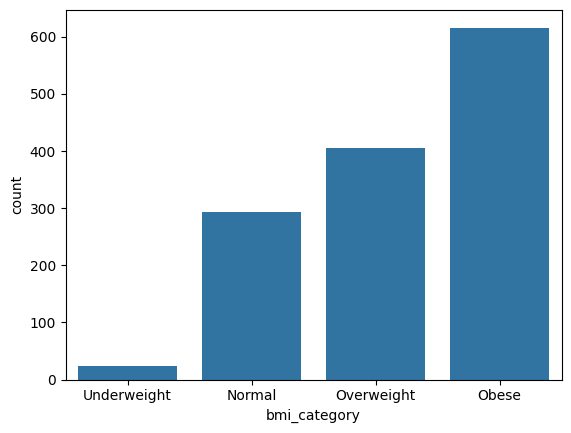

In [8]:
sns.countplot(data=df, x='bmi_category')

In [17]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_Underweight,bmi_Normal,bmi_Overweight,bmi_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


Feature Scaling

In [19]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 5.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.0 MB 3.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.0 MB 4.1 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 3.8 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 3.8 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 3.6 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 3.7 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 3.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 3.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 3.6 MB/s  0:00:02

   ------------- -------------------------- 1/3 [joblib]
   ------------- -----------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scalar = StandardScaler()
df[cols] = scalar.fit_transform(df[cols])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_Underweight,bmi_Normal,bmi_Overweight,bmi_Obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,0,1,0,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,0,1,0,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,0,1,0,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,0,1,0,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,0,1,0,0,0,0,1,0


Correlation of all features with respect to charges:

charges             1.000000
smoker              0.787251
age                 0.299009
bmi                 0.196188
bmi_Obese           0.190052
region_southeast    0.073981
children            0.067999
region_northeast    0.006350
region_northwest   -0.039905
region_southwest   -0.043210
bmi_Underweight    -0.050484
sex                -0.057293
bmi_Overweight     -0.082547
bmi_Normal         -0.121151
Name: charges, dtype: float64


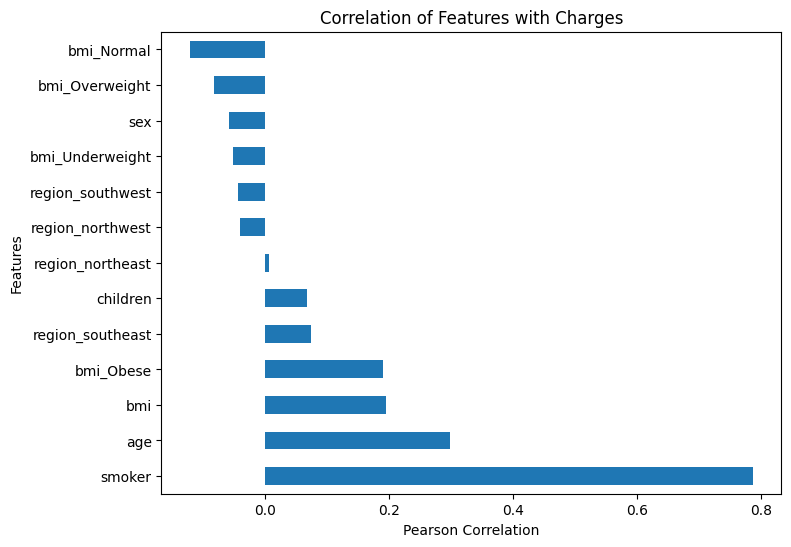

In [ ]:


# 1. Compute Pearson correlation matrix
corr_matrix = df.corr()

# 2. Extract correlation of all columns with respect to 'charges'
corr_with_charges = corr_matrix['charges']

# 3. Sort values (most important on top)
corr_with_charges = corr_with_charges.sort_values(ascending=False)

# 4. Print result
print("Correlation of all features with respect to charges:\n")
print(corr_with_charges)

# 5. Plot bar chart for better visualization
plt.figure(figsize=(8,6))
corr_with_charges.drop('charges').plot(kind='barh')
plt.title('Correlation of Features with Charges')
plt.xlabel('Pearson Correlation')
plt.ylabel('Features')
plt.show()


In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_Underweight,bmi_Normal,bmi_Overweight,bmi_Obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,0,1,0,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,0,1,0,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,0,1,0,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,0,1,0,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,0,1,0,0,0,0,1,0


In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

# Convert charges into categories
df['charges_cat'] = pd.cut(
    df['charges'],
    bins=[0, 10000, 20000, df['charges'].max()],
    labels=['Low', 'Medium', 'High']
)


In [32]:
from scipy.stats import chi2_contingency
import pandas as pd

categorical_cols = [
    'sex', 'smoker',
    'region_northeast', 'region_northwest',
    'region_southeast', 'region_southwest',
    'bmi_Underweight', 'bmi_Normal',
    'bmi_Overweight', 'bmi_Obese'
]

results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['charges_cat'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    results.append({
        'Feature': col,
        'Chi-Square': chi2,
        'P-value': p
    })

chi_square_results = pd.DataFrame(results)
chi_square_results.sort_values(by='P-value')


,Feature,Chi-Square,P-value
1,smoker,733.258130,5.956897e-160
9,bmi_Obese,16.573339,2.518518e-04
0,sex,9.355428,9.300249e-03
7,bmi_Normal,7.610530,2.225330e-02
4,region_southeast,5.920492,5.180617e-02
5,region_southwest,2.768503,2.505113e-01
8,bmi_Overweight,2.757027,2.519527e-01
6,bmi_Underweight,2.593873,2.733680e-01
2,region_northeast,2.467383,2.912156e-01
3,region_northwest,0.711694,7.005797e-01
